In [1567]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("earthquake_1995-2023.csv")
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.
umbral_terremoto = 7
df['terremoto'] = np.where(df['magnitude'] >= umbral_terremoto, 1, 0)


In [1568]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#df.head()
df.head()


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,terremoto
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu,0
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN,0
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina,0
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN,1
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN,1


In [1569]:
# title: título nombre dado al terremoto
# magnitude: La magnitud del terremoto
# date_time: fecha y hora
# cdi: la intensidad máxima reportada para el rango del evento
# mmi: La intensidad instrumental máxima estimada para el evento.
# alert: el nivel de alerta: “verde”, “amarillo”, “naranja” y “rojo”
# tsunami: "1" para eventos en regiones oceánicas y "0" en caso contrario
# sig: un número que describe la importancia del evento. Los números más grandes indican un evento más significativo. Este valor se determina en
#  función de una serie de factores, que incluyen: magnitud, MMI máximo, informes sentidos e impacto estimado.
# net: el ID de un contribuyente de datos. Identifica la red considerada como la fuente de información preferida para este evento.
# nst: El número total de estaciones sismológicas utilizadas para determinar la ubicación del terremoto.
# dmin: Distancia horizontal desde el epicentro hasta la estación más cercana
# gap: la brecha azimutal más grande entre estaciones azimutalmente adyacentes (en grados). En general, cuanto menor sea este número, 
# más fiable será la posición horizontal calculada del terremoto. Los lugares donde se producen terremotos en los que la brecha azimutal 
# supera los 180 grados suelen tener grandes incertidumbres de ubicación y profundidad.
# magType: el método o algoritmo utilizado para calcular la magnitud preferida para el evento
# depth: La profundidad donde el terremoto comienza a romperse
# latitude/longitude: sistema de coordenadas mediante el cual se puede determinar y describir la posición o ubicación de cualquier lugar de 
# la superficie terrestre
# location: ubicación dentro del país
# continent: continente del país afectado por el terremoto
# country: país afectado
#terremoto: indica 1 si es terremoto y 0 si no lo es segun la escala de richter

In [1570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
 19  terremoto  1000 non-null   int64  
dtypes: float6

terremoto
0    627
1    373
Name: count, dtype: int64


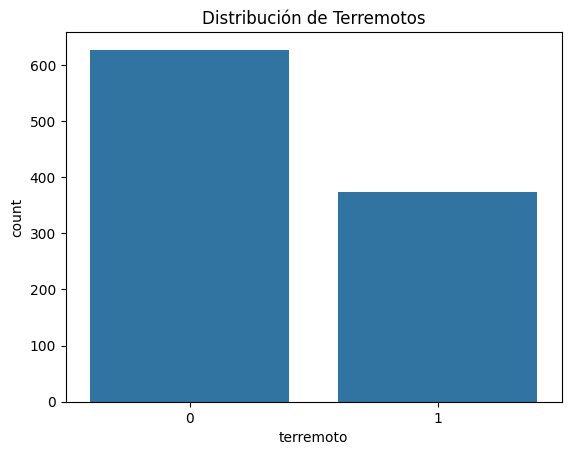

In [1571]:
# Contar los valores únicos
print(df['terremoto'].value_counts())

# Visualizar la distribución
sns.countplot(x='terremoto', data=df)
plt.title('Distribución de Terremotos')
plt.show()

In [1572]:
df.shape

(1000, 20)

In [1573]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576,0.373000
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302,0.483844
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,0.000000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450,0.000000
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000,0.000000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750,1.000000
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,1.000000


In [1574]:
df.isnull().sum()/df.shape[0]*100

title         0.0
magnitude     0.0
date_time     0.0
cdi           0.0
mmi           0.0
alert        55.1
tsunami       0.0
sig           0.0
net           0.0
nst           0.0
dmin          0.0
gap           0.0
magType       0.0
depth         0.0
latitude      0.0
longitude     0.0
location      0.6
continent    71.6
country      34.9
terremoto     0.0
dtype: float64

In [1575]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'terremoto'],
      dtype='object')

Limpia columnas irrelevantes para la clasificación

In [1576]:

df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,terremoto
0,6.5,16-08-2023 12:47,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,0
1,6.5,19-07-2023 00:22,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,0
2,6.6,17-07-2023 03:05,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,0
3,7.2,16-07-2023 06:48,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,1
4,7.3,16-07-2023 06:48,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,1


In [1577]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_6824\3140321069.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


In [1578]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,terremoto,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,0,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,0,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,0,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,1,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,1,2023,7


In [1579]:
df.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
country      349
terremoto      0
Year           0
Month          0
dtype: int64

In [1580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   net        1000 non-null   object 
 6   nst        1000 non-null   int64  
 7   dmin       1000 non-null   float64
 8   gap        1000 non-null   float64
 9   magType    1000 non-null   object 
 10  depth      1000 non-null   float64
 11  latitude   1000 non-null   float64
 12  longitude  1000 non-null   float64
 13  country    651 non-null    object 
 14  terremoto  1000 non-null   int64  
 15  Year       1000 non-null   int32  
 16  Month      1000 non-null   int32  
dtypes: float64(6), int32(2), int64(6), object(3)
memory usage: 125.1+ KB


EDA

<Axes: xlabel='magnitude', ylabel='count'>

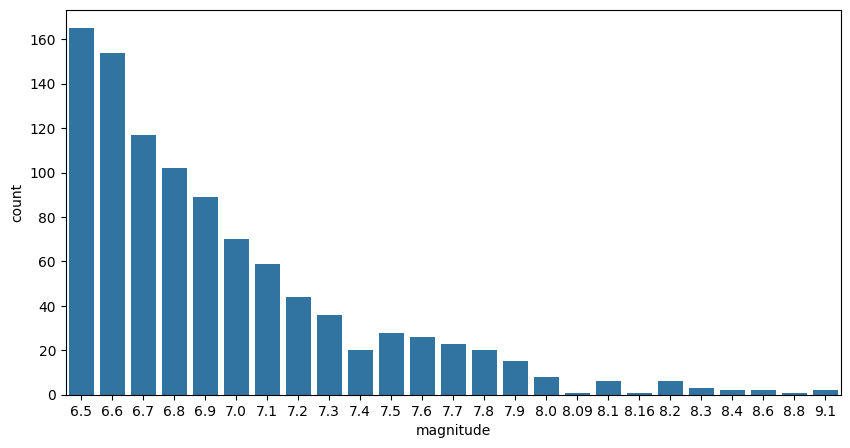

In [1581]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale


Text(0.5, 1.0, 'TOP 15 terremotos x pais')

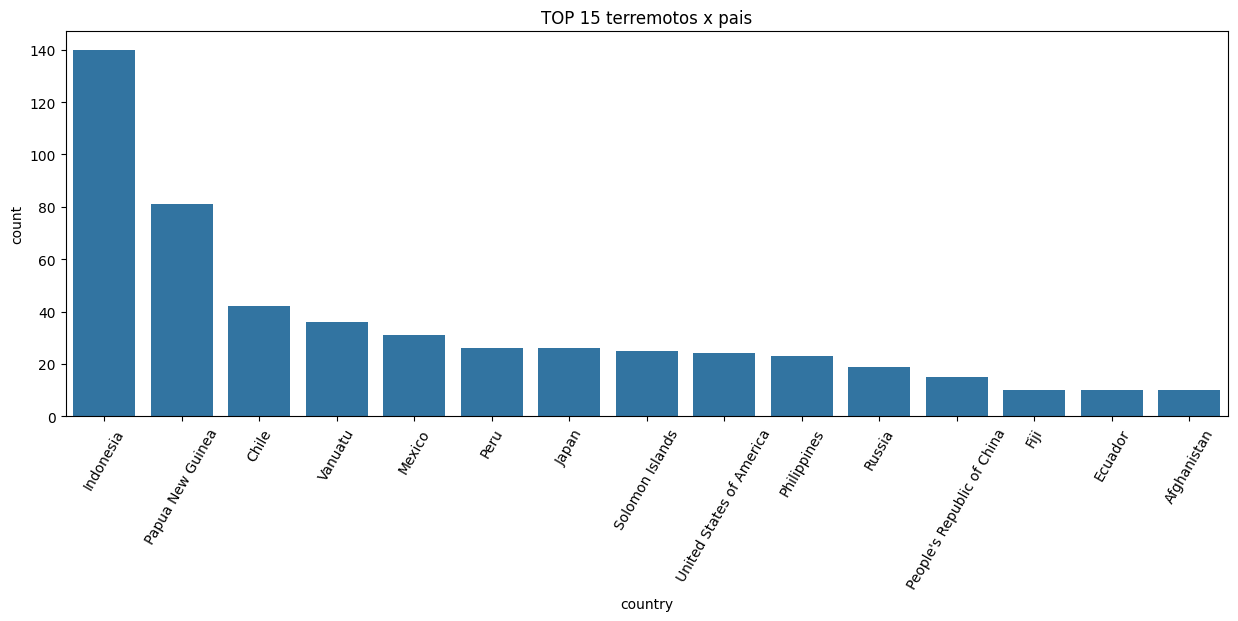

In [1582]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 terremotos x pais')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'PROBABILIDAD DE TERREMOTO EN LOS 10 PAÍSES TOP ')

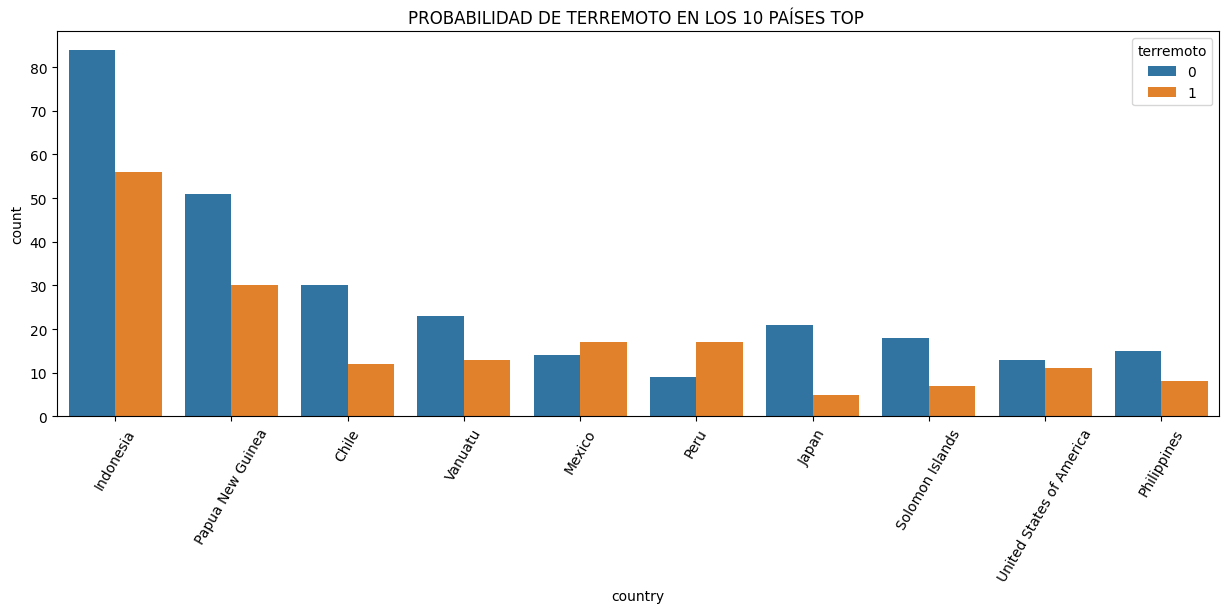

In [1583]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='terremoto')
plt.xticks(rotation=60)
plt.title('PROBABILIDAD DE TERREMOTO EN LOS 10 PAÍSES TOP ')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.


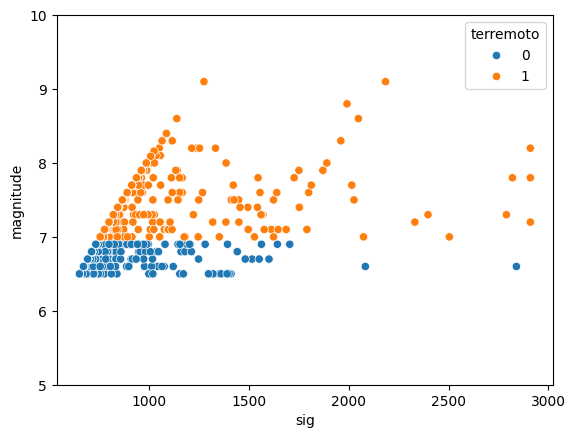

In [1584]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='terremoto')
plt.ylim(5, 10)  # Ajusta los límites según tus necesidades
plt.show()
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'Distribucion de terremotos')

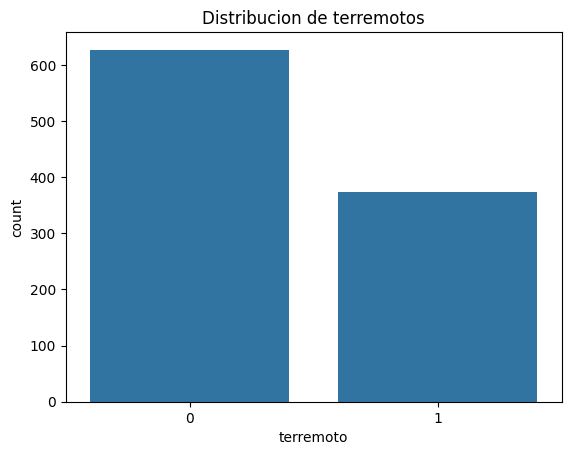

In [1585]:
sns.countplot(x='terremoto',data=df)
plt.title('Distribucion de terremotos')

<Axes: xlabel='Year', ylabel='count'>

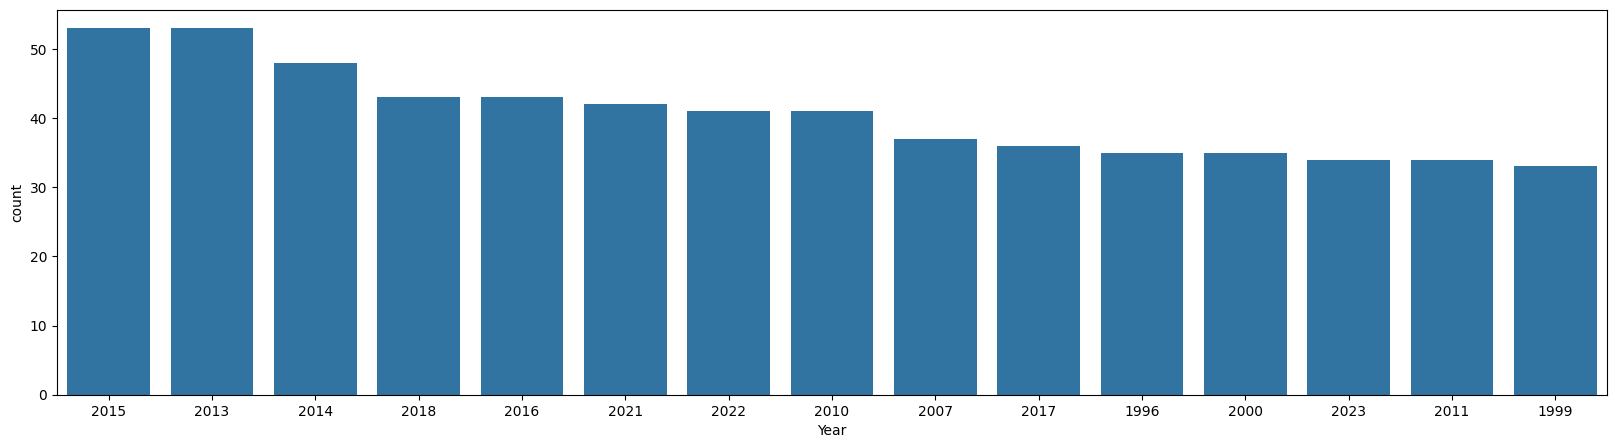

In [1586]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')

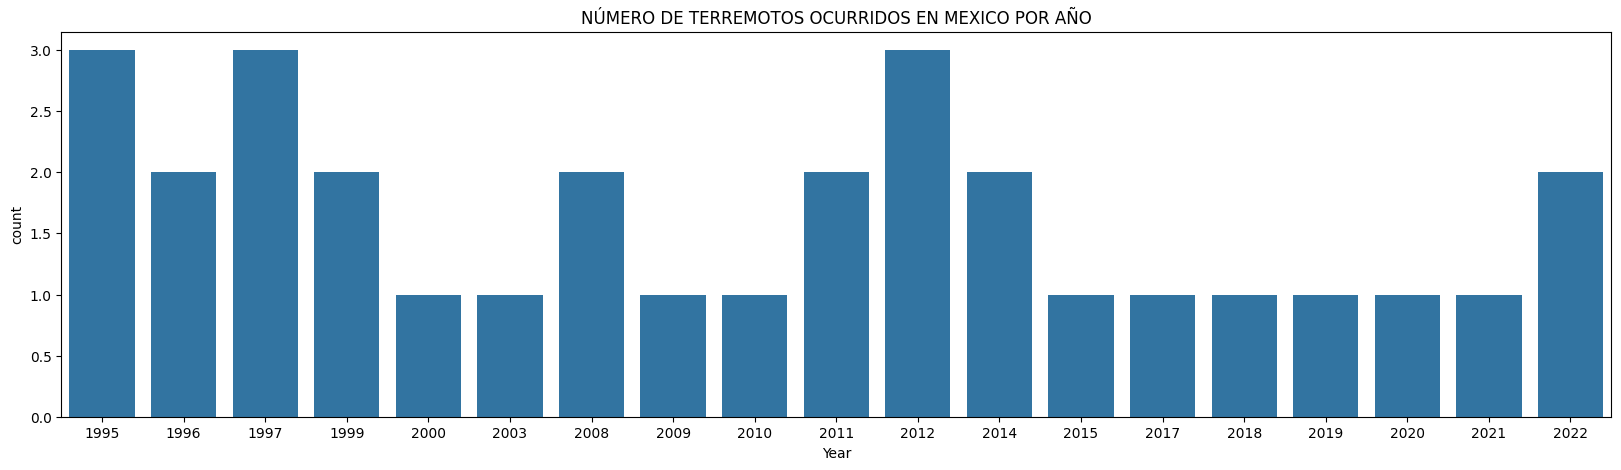

In [1587]:
Indo=df[df['country']=='Mexico']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')
#Indonesia encountered 13 earthquic in the year 2007

In [1588]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude

In [1589]:
obj=df.select_dtypes(include=['object'])
obj.head()
#we can drop net because 95% of data contributed by US 

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,at,Mi


In [1590]:
obj.nunique()

net        11
magType     9
dtype: int64

In [1591]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)

lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,0,2023,8,8
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,0,2023,7,8
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,0,2023,7,8
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,1,2023,7,8
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,1,2023,7,0


<Axes: >

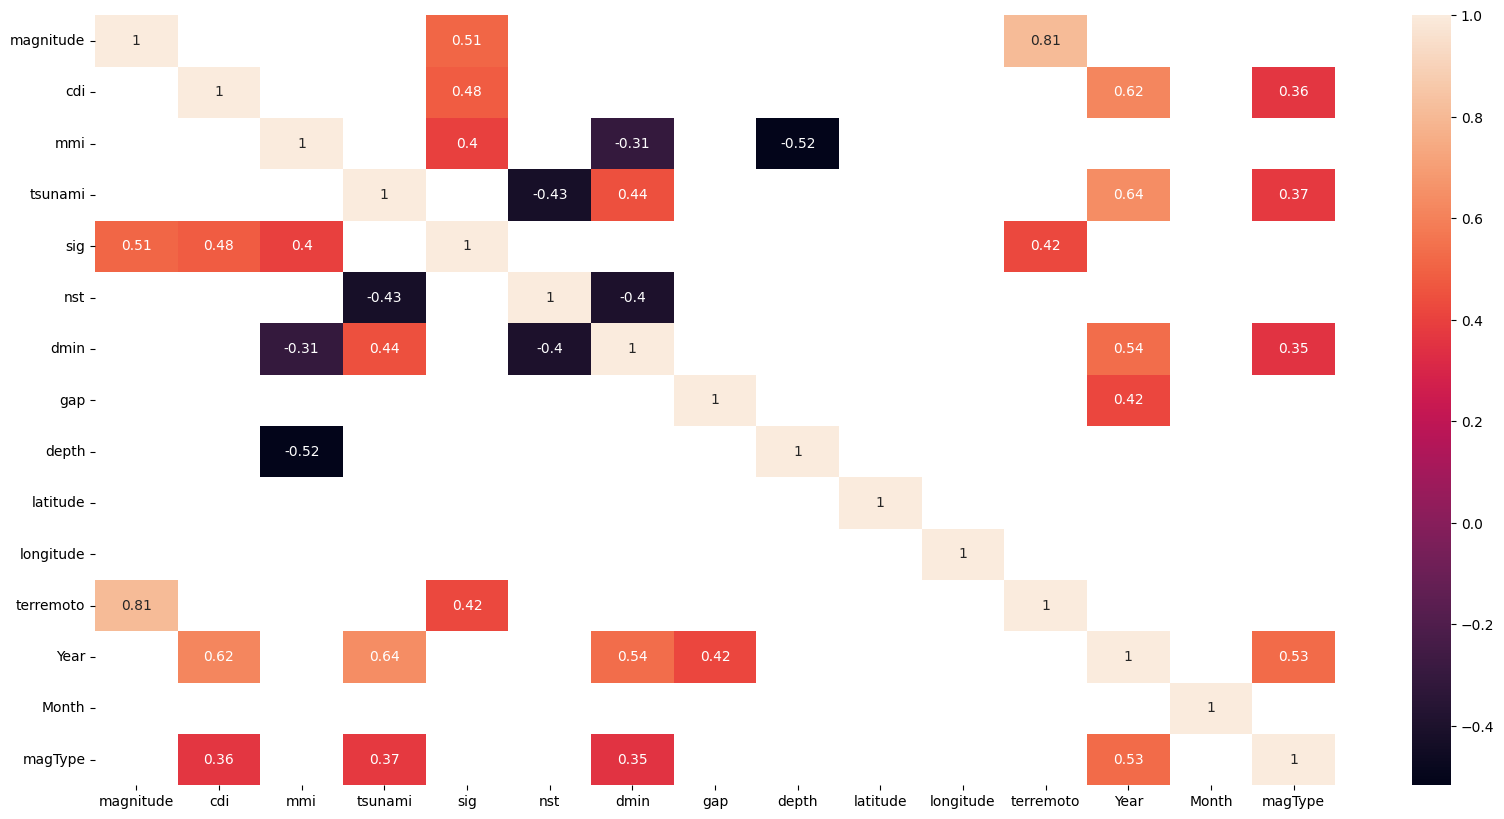

In [1592]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [1593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
 11  terremoto  1000 non-null   int64  
 12  Year       1000 non-null   int32  
 13  Month      1000 non-null   int32  
 14  magType    1000 non-null   int64  
dtypes: float64(6), int32(2), int64(7)
memory usage: 109.5 KB


In [1594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
 11  terremoto  1000 non-null   int64  
 12  Year       1000 non-null   int32  
 13  Month      1000 non-null   int32  
 14  magType    1000 non-null   int64  
dtypes: float64(6), int32(2), int64(7)
memory usage: 109.5 KB


In [1595]:
print(df.columns)

Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
       'magType'],
      dtype='object')


In [1596]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin',  'Year', 'Month', 'magType']]
y = df['terremoto']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 


In [1597]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       195
           1       0.78      0.81      0.79       105

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1598]:
confusion_matrix(y_test, y_pred)

array([[171,  24],
       [ 20,  85]])

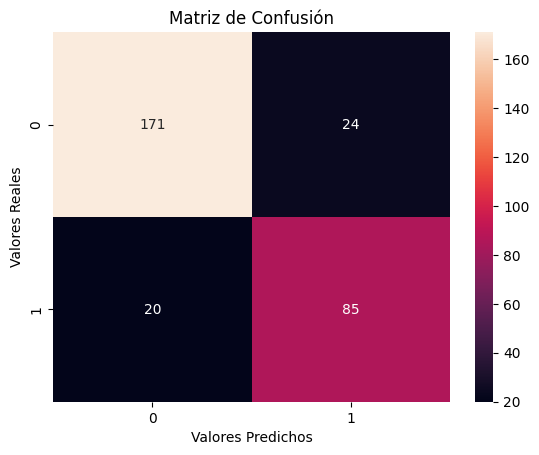

In [1599]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión (suponiendo que ya tienes y_test e y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

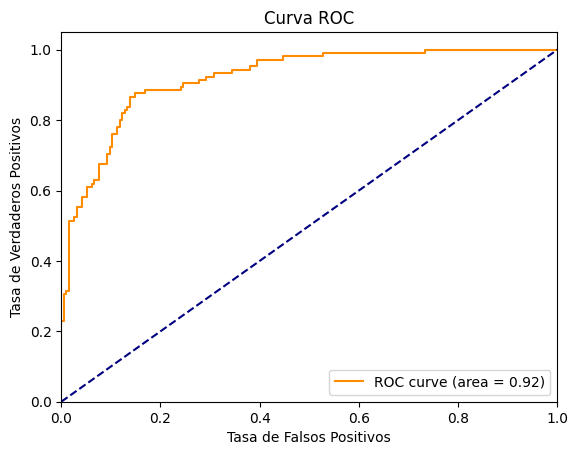

Text(0.5, 1.0, 'Histograma de errores')

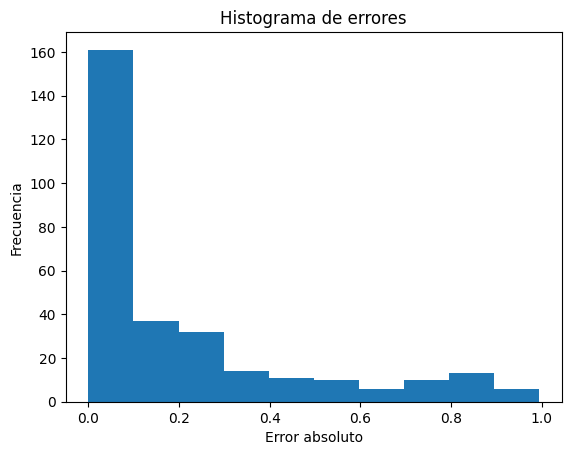

In [1600]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de pertenecer a la clase positiva
y_pred = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')

CLUSTERING

In [ ]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
       'magType'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'df'

# Seleccionar las características relevantes
X = df[['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
       'magType']]

# Crear un modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
df['cluster'] = labels

In [ ]:
df.head()


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType,cluster
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,0,2023,8,8,0
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,0,2023,7,8,0
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,0,2023,7,8,0
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,1,2023,7,8,0
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,1,2023,7,0,0


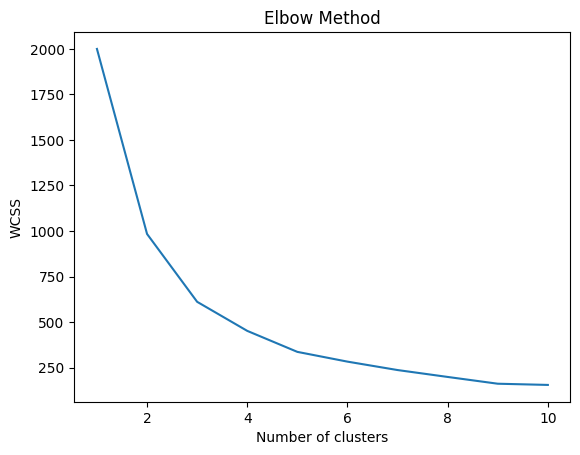

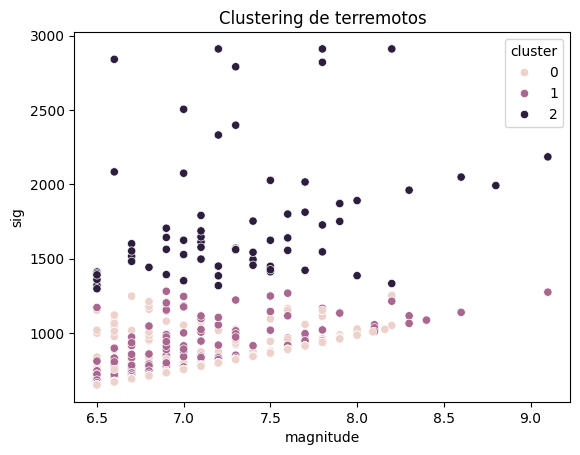

In [ ]:
X = df[['magnitude', 'sig']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Método del codo (ejemplo)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
sns.scatterplot(x='magnitude', y='sig', hue='cluster', data=df)
plt.title('Clustering de terremotos')
plt.show()

In [ ]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
       'magType', 'cluster'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 

import pandas as pd


# Selección de características con Random Forest
X = df[['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
        'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
        'magType']]

# Crear un clasificador de bosque aleatorio (aunque no sea una clasificación)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, df['terremoto'])  # Utiliza 'terremoto' como variable objetivo (aunque sea binaria)

# Seleccionar las características más importantes
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

# Crear un nuevo DataFrame con las características seleccionadas
df_new = pd.DataFrame(X_new, columns=X.columns[model.get_support()])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
df_new.head()

,magnitude,sig,terremoto
0,6.5,657.0,0.0
1,6.5,775.0,0.0
2,6.6,899.0,0.0
3,7.2,860.0,1.0
4,7.3,820.0,1.0


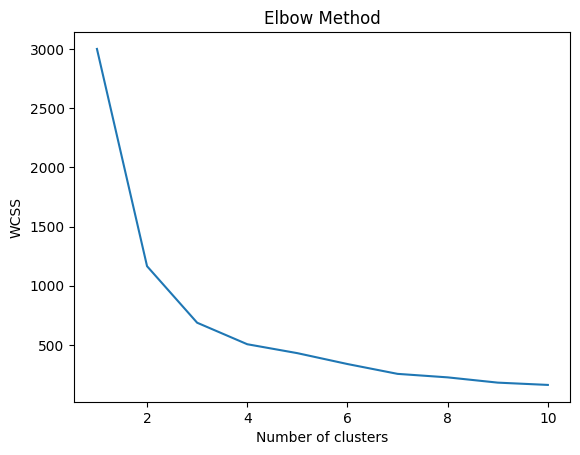

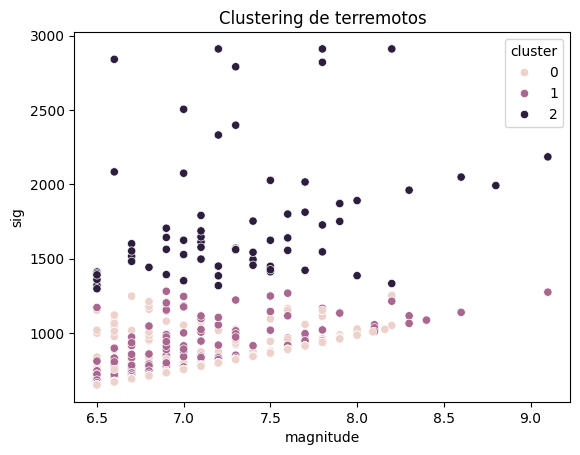

In [ ]:
X = df_new[['magnitude', 'sig','terremoto']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Método del codo (ejemplo)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
sns.scatterplot(x='magnitude', y='sig', hue='cluster', data=df)
plt.title('Clustering de terremotos')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Generar 1000 filas de datos
new_data = pd.DataFrame({
    'magnitude': np.random.uniform(1.0, 3.5, 1000),  # Magnitud entre 2.0 y 6.0
    'cdi': np.random.randint(0, 10, 1000),
    'mmi': np.random.randint(0, 10, 1000),
    'tsunami': np.random.randint(0, 2, 1000),  # 0 o 1
    'sig': np.random.randint(0, 1500, 1000),
    'nst': np.random.randint(0, 300, 1000),
    'dmin': np.random.uniform(0, 10, 1000),  # Rango ajustado
    'gap': np.random.uniform(0, 360, 1000),  # Máximo 360 grados
    'depth': np.random.uniform(0, 700, 1000),  # Profundidad razonable
    'latitude': np.random.uniform(-90, 90, 1000),
    'longitude': np.random.uniform(-180, 180, 1000),
    'terremoto': np.random.randint(1, 4, 1000),  # 0 o 1
    'Year': np.random.randint(2000, 2024, 1000),  # Años recientes
    'Month': np.random.randint(1, 13, 1000),  # Meses del 1 al 12
    'magType': np.random.randint(0, 10, 1000)  # Rango ficticio
})

# Agregar las filas nuevas al DataFrame existente
df = pd.concat([df, new_data], ignore_index=True)

print("Se agregaron 1000 filas nuevas.")

Se agregaron 1000 filas nuevas.


Text(0.5, 1.0, 'Distribucion de terremotos')

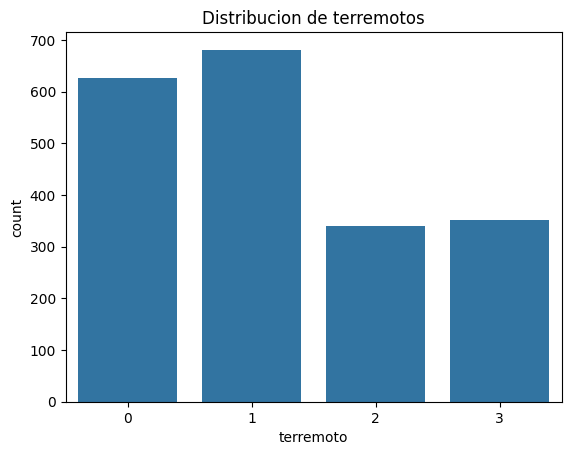

In [ ]:
sns.countplot(x='terremoto',data=df)
plt.title('Distribucion de terremotos')

In [ ]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType,cluster
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,0,2023,8,8,0.0
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,0,2023,7,8,0.0
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,0,2023,7,8,0.0
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,1,2023,7,8,0.0
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,1,2023,7,0,0.0


In [ ]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin', 'gap', 'depth', 'Year', 'Month', 'magType']]
y = df['terremoto']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.64      0.76      0.69       195
           1       0.38      0.38      0.38       200
           2       0.32      0.24      0.27        97
           3       0.42      0.37      0.39       108

    accuracy                           0.48       600
   macro avg       0.44      0.44      0.43       600
weighted avg       0.46      0.48      0.47       600



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_new.head()

,magnitude,sig,terremoto
0,6.5,657.0,0.0
1,6.5,775.0,0.0
2,6.6,899.0,0.0
3,7.2,860.0,1.0
4,7.3,820.0,1.0


In [ ]:

# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df_new[['magnitude', 'sig']]
y = df_new['terremoto']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression()

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       195
         1.0       0.98      1.00      0.99       105

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



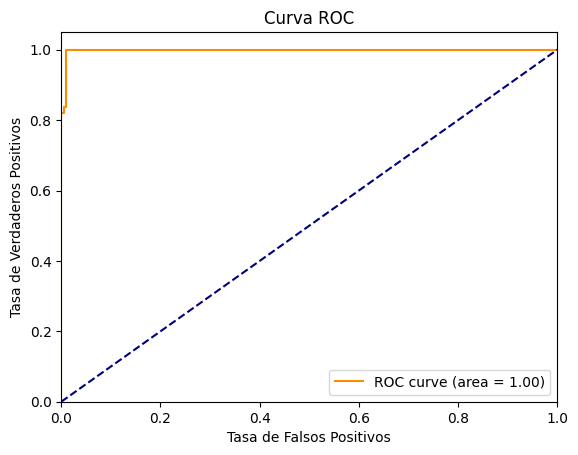

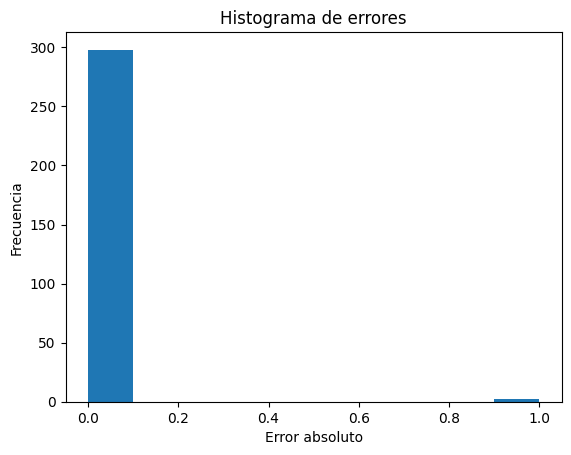

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de pertenecer a la clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')
plt.show()